# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [275]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [276]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
 

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [277]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
short_cities = cities[:1]
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q="+ city + "&appid="+ weather_api_key +"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass 
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rajpur
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | caconda
Processing Record 5 of Set 1 | lauro de freitas
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | idri
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | konosha
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | saratamata
City not found. Skipping...
Processing Record 18 of Set 1 | kovdor
Processing Record 19 of Set 1 | amursk
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | weno
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | howrah
Processing Record 39 of Set 4 | barah
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | nabire
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | katsuren-haebaru
Processing Record 44 of Set 4 | santyoku
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | kawalu
Processing Record 47 of Set 4 | vilyuchinsk
Processing Record 48 of Set 4 | megion
Processing Record 49 of Set 4 | tralee
Processing Record 0 of Set 5 | saint-louis
Processing Record 1 of Set 5 | sola
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | borujerd
Processing Record 5 of Set 5 | maragogi
Processing Record 6 of Set 5 | limon
Processing Record 7 of Set 5 | mount pearl
Processing Record 8 of Set 5 | n'dalatando
Processing Record 9 of Set 5 | cidade velha
Processing Record 10 of Set 5 | smara
Processing Record 11

Processing Record 28 of Set 8 | rosarito
Processing Record 29 of Set 8 | urengoy
Processing Record 30 of Set 8 | ramhormoz
Processing Record 31 of Set 8 | vorgashor
Processing Record 32 of Set 8 | meybod
Processing Record 33 of Set 8 | luau
Processing Record 34 of Set 8 | muroto-misakicho
Processing Record 35 of Set 8 | zeya
Processing Record 36 of Set 8 | akureyri
Processing Record 37 of Set 8 | filey
Processing Record 38 of Set 8 | gonabad
Processing Record 39 of Set 8 | revda
Processing Record 40 of Set 8 | bardai
Processing Record 41 of Set 8 | kourou
Processing Record 42 of Set 8 | severobaykal'sk
Processing Record 43 of Set 8 | portland
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | korla
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | cedro
Processing Record 48 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 49 of Set 8 | namibe
Processing Record 0 of Set 9 | gibara
Processing Record 1 of Set 9 | joensu

Processing Record 19 of Set 12 | champerico
Processing Record 20 of Set 12 | iquique
Processing Record 21 of Set 12 | shimoda
Processing Record 22 of Set 12 | lensk
Processing Record 23 of Set 12 | inari
Processing Record 24 of Set 12 | inarajan village
Processing Record 25 of Set 12 | sargatskoye
Processing Record 26 of Set 12 | samoylovka
Processing Record 27 of Set 12 | karur
Processing Record 28 of Set 12 | savanna-la-mar
Processing Record 29 of Set 12 | mongu
Processing Record 30 of Set 12 | ujae
Processing Record 31 of Set 12 | mahabe
City not found. Skipping...
Processing Record 32 of Set 12 | horsham
Processing Record 33 of Set 12 | huanren
Processing Record 34 of Set 12 | itaituba
Processing Record 35 of Set 12 | tengrela
Processing Record 36 of Set 12 | nizhnedevitsk
Processing Record 37 of Set 12 | tocopilla
Processing Record 38 of Set 12 | picota
Processing Record 39 of Set 12 | shevchenko
Processing Record 40 of Set 12 | sovetskiy
Processing Record 41 of Set 12 | fort brag

In [280]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [281]:
# Display sample data
city_data_df.head(40)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rajpur,22.3000,74.3500,27.36,68,21,7.88,IN,1685066952
1,blackmans bay,-43.0167,147.3167,11.52,69,100,4.55,AU,1685066952
2,ribeira grande,38.5167,-28.7000,17.65,80,79,4.47,PT,1685066952
3,caconda,-13.7333,15.0667,13.44,70,6,0.68,AO,1685066805
4,lauro de freitas,-12.8944,-38.3272,27.01,78,75,5.14,BR,1685066954
5,hawaiian paradise park,19.5933,-154.9731,25.41,78,100,4.12,US,1685066817
6,maceio,-9.6658,-35.7353,24.69,94,75,1.54,BR,1685066954
7,bilibino,68.0546,166.4372,11.66,36,96,0.24,RU,1685066955
8,edinburgh of the seven seas,-37.0676,-12.3116,16.78,89,70,15.01,SH,1685066955
9,badger,64.8000,-147.5333,23.95,29,75,3.60,US,1685066956


In [282]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [283]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rajpur,22.3000,74.3500,27.36,68,21,7.88,IN,1685066952
1,blackmans bay,-43.0167,147.3167,11.52,69,100,4.55,AU,1685066952
2,ribeira grande,38.5167,-28.7000,17.65,80,79,4.47,PT,1685066952
3,caconda,-13.7333,15.0667,13.44,70,6,0.68,AO,1685066805
4,lauro de freitas,-12.8944,-38.3272,27.01,78,75,5.14,BR,1685066954


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

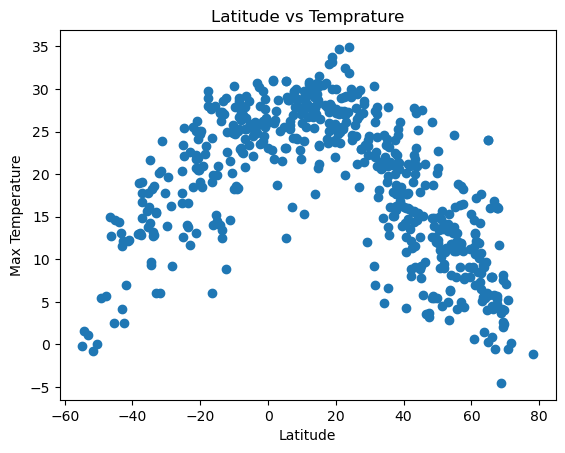

In [284]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],(city_data_df["Max Temp"]))
# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature")
plt.title("Latitude vs Temprature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

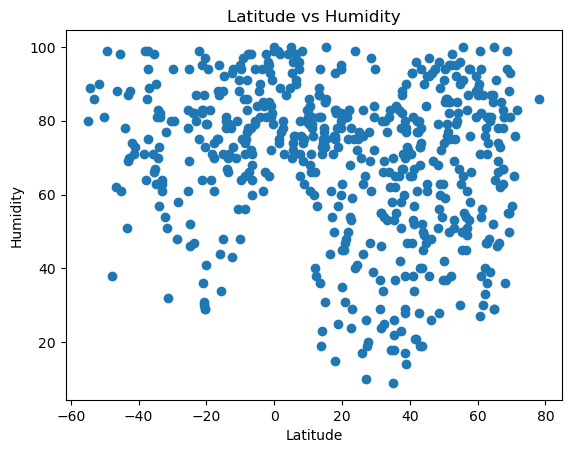

In [285]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

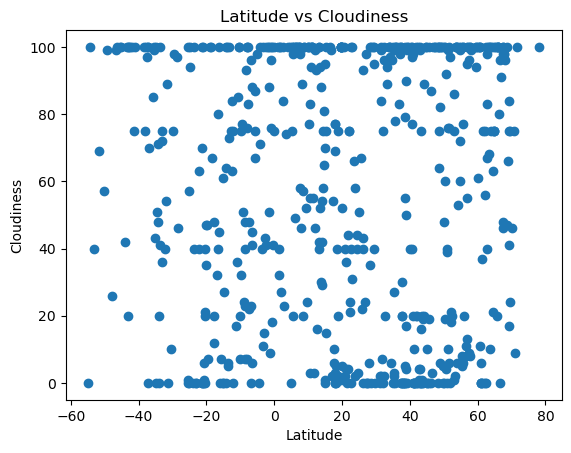

In [286]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],(city_data_df["Cloudiness"]))

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

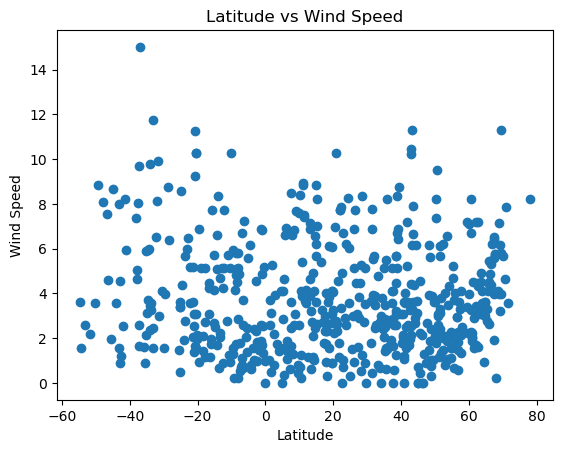

In [287]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],(city_data_df["Wind Speed"]))

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [288]:
# Define a function to create Linear Regression plots
def create_linearplot(dataframe, x_name, y_name):

    #Step 1: create x and y values from Dataframe
    x_values = pd.to_numeric(dataframe[x_name]).astype(float)
    y_values = pd.to_numeric(dataframe[y_name]).astype(float)

    #Step 2: calculate slope and y-intercept
    (slope, y_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Step 3: create linear regression equation
    regress_values = x_values * slope + y_intercept
    line_equation_string = "y = " + str(round(slope, 2)) + "x + " + str(round(y_intercept, 2))

    #Step 4: create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    #plt.annotate(line_equation_string,(6,10),fontsize=15, color="red")
    plt.annotate(line_equation_string, xy=(0.8,0.2),xycoords='axes fraction', fontsize=12, color = 'red')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(y_name + " vs. " + x_name + " Linear Regression Plot")
    print(f"The r-squared is:{rvalue}")
    plt.show()




In [289]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rajpur,22.3000,74.3500,27.36,68,21,7.88,IN,1685066952
2,ribeira grande,38.5167,-28.7000,17.65,80,79,4.47,PT,1685066952
5,hawaiian paradise park,19.5933,-154.9731,25.41,78,100,4.12,US,1685066817
7,bilibino,68.0546,166.4372,11.66,36,96,0.24,RU,1685066955
9,badger,64.8000,-147.5333,23.95,29,75,3.60,US,1685066956


In [290]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,11.52,69,100,4.55,AU,1685066952
3,caconda,-13.7333,15.0667,13.44,70,6,0.68,AO,1685066805
4,lauro de freitas,-12.8944,-38.3272,27.01,78,75,5.14,BR,1685066954
6,maceio,-9.6658,-35.7353,24.69,94,75,1.54,BR,1685066954
8,edinburgh of the seven seas,-37.0676,-12.3116,16.78,89,70,15.01,SH,1685066955


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is:-0.8087025037443033


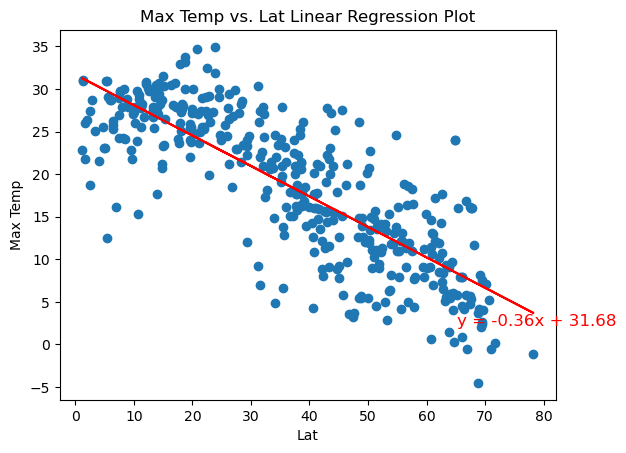

In [291]:
# Linear regression on Northern Hemisphere
create_linearplot(northern_hemi_df,"Lat","Max Temp")

The r-squared is:0.7795071195898404


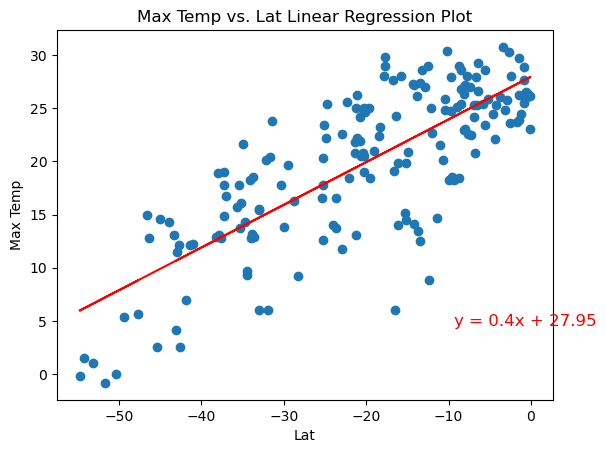

In [292]:
# Linear regression on Southern Hemisphere
create_linearplot(southern_hemi_df,"Lat","Max Temp")

**Discussion about the linear relationship:** The regression displays a negative correlation. In the northern hemishpere, as you move away from the equator the temprature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is:-0.06033535053511415


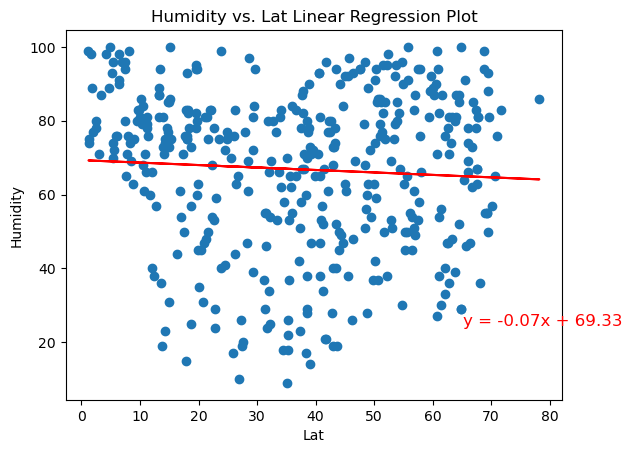

In [293]:
# Northern Hemisphere
create_linearplot(northern_hemi_df,"Lat","Humidity")

The r-squared is:0.1084874880189376


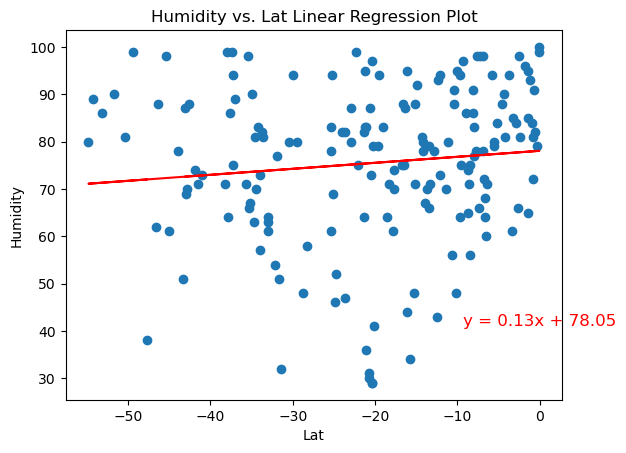

In [294]:
# Southern Hemisphere
create_linearplot(southern_hemi_df,"Lat","Humidity")

**Discussion about the linear relationship:** The regression doesn not display much of a correlation between the data sets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is:-0.00017154429813335466


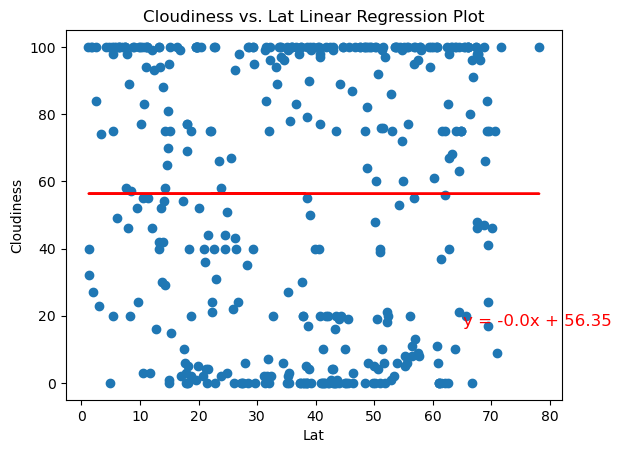

In [295]:
# Northern Hemisphere
create_linearplot(northern_hemi_df,"Lat","Cloudiness")

The r-squared is:0.7795071195898404


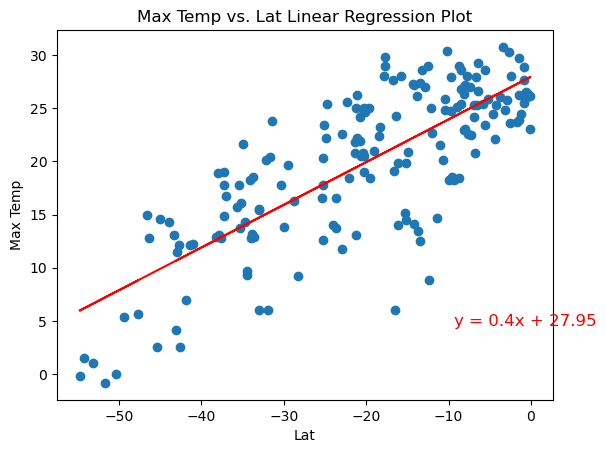

In [296]:
# Southern Hemisphere
create_linearplot(southern_hemi_df,"Lat","Max Temp")

**Discussion about the linear relationship:** The regression does not display much of a correlation between the data sets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is:0.04571175064129175


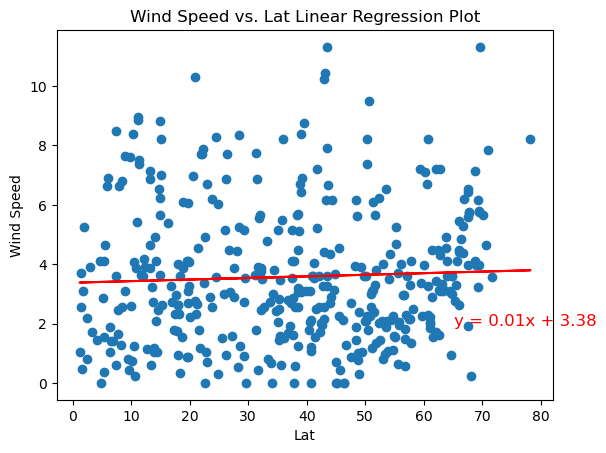

In [297]:
# Northern Hemisphere
create_linearplot(northern_hemi_df,"Lat","Wind Speed")

The r-squared is:-0.24901370214307572


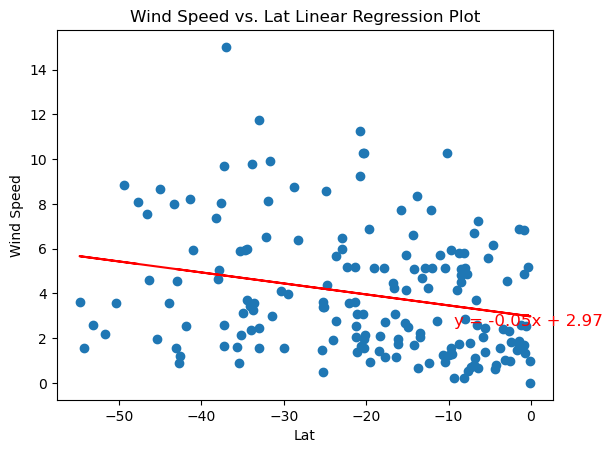

In [298]:
# Southern Hemisphere
create_linearplot(southern_hemi_df,"Lat","Wind Speed")

**Discussion about the linear relationship:The regression does not display much of a correlation between the data sets.